<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/HW_Week02_SimpleLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

This homework assignment aims to build a linear model to describe the trend of height increase for the United Kingdom between 1900 and 1980.

**Please complete this notebook and submit it to Blackboard as a PDF file before Wednesday, March 2nd at 11:59PM.**






1. Extract the average height values for **United Kingdom** between 1900 and 1980 from the dataset used in Week 2 notebook.

In [1]:
import pandas as pd

raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')
raw_data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8
...,...,...,...,...
1245,Zimbabwe,ZWE,1900,167.6
1246,Zimbabwe,ZWE,1950,171.0
1247,Zimbabwe,ZWE,1960,171.1
1248,Zimbabwe,ZWE,1970,171.3


In [2]:
raw_UK = raw_data[raw_data.Entity == 'United Kingdom']
raw_UK

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1176,United Kingdom,GBR,1810,169.7
1177,United Kingdom,GBR,1820,169.1
1178,United Kingdom,GBR,1830,166.7
1179,United Kingdom,GBR,1840,166.5
1180,United Kingdom,GBR,1850,165.6
1181,United Kingdom,GBR,1860,166.6
1182,United Kingdom,GBR,1870,167.2
1183,United Kingdom,GBR,1880,168.0
1184,United Kingdom,GBR,1890,167.4
1185,United Kingdom,GBR,1900,169.4


In [9]:
UK_1900 = raw_UK[raw_UK.Year >= 1900]
UK_1900

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [12]:
AVG_UK = UK_1900['Human Height (University of Tuebingen (2015))'].mean()
AVG_UK

174.1

2. Find a linear model (height = m * year + b) that can describe the trend of height increase.
    - The value of `m` should be close to the average height increase
    - The value of `b` should make the line close to the data points.

In [31]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

model = LinearRegression()
model.fit(raw_data[['Year']], raw_data[['Human Height (University of Tuebingen (2015))']])
m = model.coef_[0,0]
b = model.intercept_[0]
x = np.array([raw_data.Year.min(), raw_data.Year.max()])
height = m * x + b
height

array([163.47798227, 170.57544096])

3. Display the model line together with the data points.

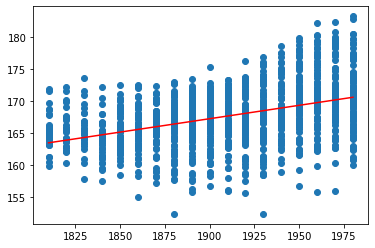

In [30]:
plt.scatter(raw_data['Year'], raw_data['Human Height (University of Tuebingen (2015))'])
plt.plot(x, height, 'r-')
plt.show()

4. Compute the mean square error of this model. 

In [58]:
total_err = 0
for x in raw_data.index:
    year = raw_data.loc[x, 'Year']
    err = (m * year + b - raw_data.loc[x, 'Human Height (University of Tuebingen (2015))']) ** 2
    total_err += err
print('MSE:', total_err / len(raw_data))

MSE: 17.643093595105366
